### **Call for Service New Orleans**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [226]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime as dt
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math 

In [ ]:
df16=pd.read_csv('/content/drive/My Drive/Calls_for_Service_2016.csv')
df17=pd.read_csv('/content/drive/My Drive/Calls_for_Service_2017.csv')
df18=pd.read_csv('/content/drive/My Drive/Calls_for_Service_2018.csv')
df19=pd.read_csv('/content/drive/My Drive/Calls_for_Service_2019.csv')
df20=pd.read_csv('/content/drive/My Drive/Call_for_Service_2020.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df20.head()

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,A3472220,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3688756,528696,01/28/2020 01:37:20 AM,01/28/2020 01:37:20 AM,01/28/2020 01:37:28 AM,01/28/2020 02:25:50 AM,NAT,Necessary Action Taken,N,4G04,Atlantic Ave & Slidell St,70114,4,POINT (-90.04525645 29.94750953)
1,A0000220,21,COMPLAINT OTHER,1J,21,COMPLAINT OTHER,1J,3668710,533007,01/01/2020 12:00:42 AM,01/01/2020 12:00:42 AM,01/01/2020 12:00:42 AM,01/01/2020 01:37:16 AM,NAT,Necessary Action Taken,Y,2U04,034XX Broadway St,70125,2,POINT (-90.10840522 29.95996774)
2,A2190820,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3682445,530709,01/17/2020 09:18:41 PM,01/17/2020 09:18:41 PM,01/17/2020 09:18:47 PM,01/17/2020 09:18:54 PM,NAT,Necessary Action Taken,N,8B02,N Peters St & Bienville St,70130,8,POINT (-90.065113 29.95323762)
3,A2874820,21,COMPLAINT OTHER,2A,21,COMPLAINT OTHER,1J,3737616,590067,01/23/2020 10:19:48 AM,01/23/2020 10:22:05 AM,01/23/2020 10:31:11 AM,01/23/2020 10:34:35 AM,GOA,GONE ON ARRIVAL,N,7L08,I-10 E,70129,7,POINT (-89.88854843 30.11465463)
4,A2029120,34S,AGGRAVATED BATTERY BY SHOOTING,2C,34S,AGGRAVATED BATTERY BY SHOOTING,2C,3696210,551411,01/16/2020 05:09:05 PM,01/16/2020 05:09:43 PM,01/16/2020 05:16:07 PM,01/16/2020 10:49:37 PM,RTF,REPORT TO FOLLOW,N,7A01,Chef Menteur Hwy & Downman Rd,70126,7,POINT (-90.02090137 30.00973449)


In [ ]:
df20['TypeText'].value_counts()

AREA CHECK                    103577
COMPLAINT OTHER                61675
DISTURBANCE (OTHER)            26453
BUSINESS CHECK                 25720
BURGLAR ALARM, SILENT          18427
                               ...  
VOTING/ELECTION EVENT              1
DESECRATION OF GRAVES              1
HOMICIDE DOMESTIC                  1
CRIMINAL MISCHIEF DOMESTIC         1
AIRPLANE CRASH                     1
Name: TypeText, Length: 169, dtype: int64

In [ ]:
df20['TypeText'].value_counts().idxmax()

'AREA CHECK'

In [ ]:
df20['TypeText'].value_counts()['AREA CHECK']/len(df20)

0.23926753093150255

In [ ]:
df16

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
0,D0808216,24,MEDICAL,2B,21,COMPLAINT OTHER,2A,37369000,3513814,04/07/2016 09:24:16 PM,04/07/2016 09:26:29 PM,04/07/2016 09:37:10 PM,04/07/2016 09:47:44 PM,NAT,Necessary Action Taken,N,8F02,Dauphine St & Pauger St,70116.0,8,"(0.0, 0.0)"
1,D0812216,18,TRAFFIC INCIDENT,1H,18,TRAFFIC INCIDENT,1H,37369000,3513814,04/07/2016 09:56:49 PM,NaN,04/07/2016 09:56:49 PM,04/07/2016 09:56:54 PM,NAT,Necessary Action Taken,Y,NaN,Fou & Nas,NaN,0,"(0.0, 0.0)"
2,D0812716,103M,MENTAL PATIENT,2A,103M,MENTAL PATIENT,2A,37369000,3513814,04/07/2016 10:00:09 PM,04/07/2016 10:03:15 PM,04/07/2016 10:12:58 PM,04/07/2016 10:51:50 PM,GOA,GONE ON ARRIVAL,N,7I13,101XX Curran Blvd,70127.0,7,"(0.0, 0.0)"
3,I3355216,21,COMPLAINT OTHER,1H,21,COMPLAINT OTHER,1H,0,0,09/30/2016 02:06:54 AM,09/30/2016 02:07:09 AM,09/30/2016 02:06:54 AM,09/30/2016 04:09:56 AM,NAT,Necessary Action Taken,Y,8C02,003XX Royal St,NaN,0,NaN
4,D0816216,24,MEDICAL,2B,24,MEDICAL,2B,37369000,3513814,04/07/2016 10:48:36 PM,NaN,04/07/2016 10:48:36 PM,04/07/2016 11:14:57 PM,NAT,Necessary Action Taken,Y,8D06,007XX Bourbon St,70116.0,8,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404057,L3152216,107,SUSPICIOUS PERSON,2A,21,COMPLAINT OTHER,1H,3682489,531125,12/29/2016 09:42:03 AM,NaN,12/29/2016 09:42:03 AM,12/29/2016 10:16:56 AM,NAT,Necessary Action Taken,Y,8B02,004XX Decatur St,70130.0,8,"(29.95437985, -90.06495858)"
404058,L3282816,21,COMPLAINT OTHER,1H,21,COMPLAINT OTHER,1H,3693574,535641,12/30/2016 12:20:43 PM,NaN,12/30/2016 12:20:43 PM,12/30/2016 12:38:46 PM,NAT,Necessary Action Taken,Y,5D04,045XX Urquhart St,70117.0,5,"(29.96645755, -90.02979476)"
404059,L3293616,18,TRAFFIC INCIDENT,1H,18,TRAFFIC INCIDENT,1H,3675105,528069,12/30/2016 02:02:01 PM,NaN,12/30/2016 02:02:01 PM,12/30/2016 02:14:20 PM,NAT,Necessary Action Taken,Y,6J02,Martin Luther King Jr Blvd & S Claiborne Ave,70113.0,6,"(29.94620074, -90.0883802)"
404060,L3452316,107,SUSPICIOUS PERSON,2A,107,SUSPICIOUS PERSON,2A,3679944,527895,12/31/2016 10:12:20 PM,12/31/2016 10:13:18 PM,12/31/2016 10:17:24 PM,12/31/2016 10:58:26 PM,GOA,GONE ON ARRIVAL,N,8H01,008XX Carondelet St,70130.0,8,"(29.94557687, -90.07310661)"


In [ ]:
p16 = df16['TypeText'].value_counts()/len(df16)
p20 = df20['TypeText'].value_counts()/len(df20)
p1620 = pd.concat([p16, p20], axis=1)
p1620.columns = ['2016', '2020']
p1620

,2016,2020
COMPLAINT OTHER,0.245014,0.142472
"BURGLAR ALARM, SILENT",0.109726,0.042567
TRAFFIC INCIDENT,0.094369,0.007295
DISTURBANCE (OTHER),0.074078,0.061108
AUTO ACCIDENT,0.041377,0.024583
...,...,...
UNDERPASS MONITORING OR CLOSURE,NaN,0.000035
TROOP N AREA - BUSINESS - RESIDENCE CHECK,NaN,0.000023
FLOODED VEHICLE,NaN,0.000016
HOSTAGE SITUATION,NaN,0.000007


In [ ]:
p1620['perc decr'] = p1620['2016']- p1620['2020']
p1620.loc[p1620['perc decr'].idxmax()]['2016']

0.24501437898144343

In [ ]:
df16.iloc[:, 9:13] = df16.iloc[:, 9:13].apply(pd.to_datetime, errors='coerce')
df16.sort_values(by='TimeCreate', inplace=True, ascending=True)
len1 = len(df16)
mask = (df16['TimeCreate']<'2017-01-01 00:00:00') & ('2016-01-01 00:00:00'<=df16['TimeCreate'])
df16 = df16.loc[mask]
len2 = len(df16)
df16

In [ ]:
df16[df16['TimeCreate']=='2016-12-31 23:58:51']

In [ ]:
df17[df17['NOPD_Item']=='L3463716']

In [ ]:
df17.iloc[:, 9:13] = df17.iloc[:, 9:13].apply(pd.to_datetime, errors='coerce')
df17.sort_values(by='TimeCreate', inplace=True, ascending=True)
len3 = len(df17)
mask = (df17['TimeCreate']<'2018-01-01 00:00:00') & ('2017-01-01 00:00:00'<=df17['TimeCreate'])
df17 = df17.loc[mask]
len4 = len(df17)
df17

In [ ]:
df18.iloc[:, 9:13] = df18.iloc[:, 9:13].apply(pd.to_datetime, errors='coerce')
df18.sort_values(by='TimeCreate', inplace=True, ascending=True)
len5 = len(df18)
mask = (df18['TimeCreate']<'2019-01-01 00:00:00') & ('2018-01-01 00:00:00'<=df18['TimeCreate'])
df18 = df18.loc[mask]
len6 = len(df18)
df18

In [ ]:
df19.iloc[:, 6:10] = df19.iloc[:, 6:10].apply(pd.to_datetime, errors='coerce')
df19.sort_values(by='TimeCreate', inplace=True, ascending=True)
len7 = len(df19)
mask = (df19['TimeCreate']<'2020-01-01 00:00:00') & ('2019-01-01 00:00:00'<=df19['TimeCreate'])
df19 = df19.loc[mask]
len8 = len(df19)
df19

In [ ]:
df20[df20['NOPD_Item']=='C3808020']

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
15338,C3808020,22A,AREA CHECK,1K,22A,AREA CHECK,1K,3708835,519869,03/31/2020 11:59:32 PM,03/31/2020 11:59:32 PM,03/31/2020 11:59:32 PM,04/01/2020 12:07:52 AM,NAT,Necessary Action Taken,Y,4E04,Ernest St & General Meyer Ave,70131,4,POINT (-89.98219044 29.92260135)


In [ ]:
df20.iloc[:, 9:13] = df20.iloc[:, 9:13].apply(pd.to_datetime, errors='coerce')
df20.sort_values(by='TimeCreate', inplace=True, ascending=True)
len9 = len(df20)
mask = (df20['TimeCreate']<'2021-01-01 00:00:00') & ('2020-01-01 00:00:00'<=df20['TimeCreate'])
df20 = df20.loc[mask]
len10 = len(df20)
df20

,NOPD_Item,Type,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location
26,A0000120,94F,FIREWORKS,1A,103,DISTURBANCE (OTHER),1C,3677228,550814,2020-01-01 00:00:34,2020-01-01 02:34:18,NaT,2020-01-01 06:53:08,NAT,Necessary Action Taken,N,3N01,001XX Blk Riviera Ave,70122,3,POINT (-90.0808922 30.0086791)
1,A0000220,21,COMPLAINT OTHER,1J,21,COMPLAINT OTHER,1J,3668710,533007,2020-01-01 00:00:42,2020-01-01 00:00:42,2020-01-01 00:00:42,2020-01-01 01:37:16,NAT,Necessary Action Taken,Y,2U04,034XX Broadway St,70125,2,POINT (-90.10840522 29.95996774)
27,A0000320,94F,FIREWORKS,1A,94F,FIREWORKS,2J,3674930,533982,2020-01-01 00:01:05,2020-01-01 01:49:42,2020-01-01 02:08:17,2020-01-01 02:34:36,NAT,Necessary Action Taken,N,1H02,026XX Banks St,70119,1,POINT (-90.08872937 29.96246347)
2501,A0000420,94,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,3681805,536653,2020-01-01 00:02:50,2020-01-01 00:02:54,2020-01-01 00:09:13,2020-01-01 00:13:45,GOA,GONE ON ARRIVAL,N,1A01,Kerlerec St & N Robertson St,70116,1,POINT (-90.0669267 29.96960271)
2502,A0000520,94F,FIREWORKS,1A,94F,FIREWORKS,2J,3668697,542174,2020-01-01 00:03:46,2020-01-01 00:34:36,NaT,2020-01-01 00:42:13,NAT,Necessary Action Taken,N,3I01,053XX Memphis St,70124,3,POINT (-90.10813674 29.98517428)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432196,L3827420,94F,FIREWORKS,2J,94F,FIREWORKS,2J,3663764,535019,2020-12-31 23:53:28,2020-12-31 23:55:13,NaT,2020-12-31 23:55:19,NAT,Necessary Action Taken,N,2S02,029XX Hollygrove St,70118,2,POINT (-90.12395736 29.96564595)
432489,L3827520,21N,NOISE COMPLAINT,1G,21N,NOISE COMPLAINT,1G,3669269,532566,2020-12-31 23:54:34,2021-01-01 00:31:21,2021-01-01 00:35:24,2021-01-01 00:42:17,GOA,GONE ON ARRIVAL,N,2V03,012XX S Genois St,70125,2,POINT (-90.10665417 29.95874024)
432879,L3827920,94,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,3682718,555636,2020-12-31 23:56:11,2020-12-31 23:57:19,2021-01-01 00:27:45,2021-01-01 00:32:50,NAT,Necessary Action Taken,N,3R01,Pasteur Blvd & Robert E Lee Blvd,70122,3,POINT (-90.06337823 30.02177071)
431748,L3828020,107,SUSPICIOUS PERSON,2C,107,SUSPICIOUS PERSON,2C,3683795,525061,2020-12-31 23:56:55,2021-01-01 02:12:18,2021-01-01 02:17:29,2021-01-01 02:23:41,GOA,GONE ON ARRIVAL,N,8A01,US90B W,70130,8,POINT (-90.0610487 29.93766844)


In [ ]:
len1+len3+len5+len7+len9-len2-len4-len6-len8-len10

5724

In [ ]:
dfall = pd.concat([df16, df17, df18, df19, df20])
dfall

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,Type,TimeArrival
140042,A0000116,94F,FIREWORKS,2H,94,DISCHARGING FIREARM,2B,3661003,532567,2016-01-01 00:01:02,2016-01-01 00:46:39,NaT,2016-01-01 00:54:27,NAT,Necessary Action Taken,N,2K04,Cohn St & Hamilton St,70118,2,"(29.95898131, -90.13275636)",NaN,NaT
140043,A0000216,94F,FIREWORKS,1A,94F,FIREWORKS,1A,3666320,517836,2016-01-01 00:01:11,NaT,NaT,2016-01-01 00:48:51,DUP,DUPLICATE,N,2B03,054XX Laurel St,70115,2,"(29.91832178, -90.11646192)",NaN,NaT
140044,A0000316,94,DISCHARGING FIREARM,2B,94,DISCHARGING FIREARM,2B,3720728,574341,2016-01-01 00:01:30,2016-01-01 00:02:12,2016-01-01 00:12:20,2016-01-01 00:19:09,GOA,GONE ON ARRIVAL,N,7K04,078XX Star St,70128,7,"(30.07198839, -89.9425623)",NaN,NaT
140045,A0000416,18,TRAFFIC INCIDENT,1H,18,TRAFFIC INCIDENT,1H,3704220,522170,2016-01-01 00:01:46,NaT,2016-01-01 00:01:46,2016-01-01 00:15:41,NAT,Necessary Action Taken,Y,4D04,General Meyer Ave & Eton St,70131,4,"(29.92907717, -89.99667104)",NaN,NaT
140046,A0000516,94,DISCHARGING FIREARM,2B,94,DISCHARGING FIREARM,2B,3681555,541217,2016-01-01 00:02:13,2016-01-01 00:19:34,NaT,2016-01-01 00:19:41,NAT,Necessary Action Taken,N,5K04,A P Tureaud Ave & N Dorgenois St,70119,5,"(29.98215861, -90.0675577)",NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432196,L3827420,NaN,FIREWORKS,2J,94F,FIREWORKS,2J,3663764,535019,2020-12-31 23:53:28,2020-12-31 23:55:13,NaT,2020-12-31 23:55:19,NAT,Necessary Action Taken,N,2S02,029XX Hollygrove St,70118,2,POINT (-90.12395736 29.96564595),94F,NaT
432489,L3827520,NaN,NOISE COMPLAINT,1G,21N,NOISE COMPLAINT,1G,3669269,532566,2020-12-31 23:54:34,2021-01-01 00:31:21,2021-01-01 00:35:24,2021-01-01 00:42:17,GOA,GONE ON ARRIVAL,N,2V03,012XX S Genois St,70125,2,POINT (-90.10665417 29.95874024),21N,NaT
432879,L3827920,NaN,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,3682718,555636,2020-12-31 23:56:11,2020-12-31 23:57:19,2021-01-01 00:27:45,2021-01-01 00:32:50,NAT,Necessary Action Taken,N,3R01,Pasteur Blvd & Robert E Lee Blvd,70122,3,POINT (-90.06337823 30.02177071),94,NaT
431748,L3828020,NaN,SUSPICIOUS PERSON,2C,107,SUSPICIOUS PERSON,2C,3683795,525061,2020-12-31 23:56:55,2021-01-01 02:12:18,2021-01-01 02:17:29,2021-01-01 02:23:41,GOA,GONE ON ARRIVAL,N,8A01,US90B W,70130,8,POINT (-90.0610487 29.93766844),107,NaT


In [ ]:
dfall['TimeArrive'].fillna(dfall['TimeDispatch'], inplace=True)
dfall['TimeDispatch'].fillna(dfall['TimeArrive'], inplace=True)

In [ ]:
dfall['ResponseTime'] = dfall['TimeArrive']-dfall['TimeDispatch']
dfall['ResponseTime'] = dfall['ResponseTime'].fillna(timedelta()).apply(lambda x: x.total_seconds())

In [ ]:
dfall['ResponseTime'] 

140042       0.0
140043       0.0
140044     608.0
140045       0.0
140046       0.0
           ...  
432196       0.0
432489     243.0
432879    1826.0
431748     311.0
431964     530.0
Name: ResponseTime, Length: 2223577, dtype: float64

In [ ]:
dfall[dfall['ResponseTime']>0]['ResponseTime'].median()

319.0

In [ ]:
dfall.groupby('PoliceDistrict').mean()

,MapX,MapY,ResponseTime
PoliceDistrict,,,
0,1.877290e+07,1.771548e+06,72.653886
1,4.712924e+06,6.274814e+05,133.420127
2,4.683761e+06,6.183628e+05,193.532251
3,4.443374e+06,6.153335e+05,170.227483
4,4.841829e+06,6.235080e+05,162.339280
5,5.035523e+06,6.569055e+05,216.553001
6,4.914900e+06,6.349419e+05,169.319683
7,5.020616e+06,6.758353e+05,299.324781
8,5.491352e+06,6.914530e+05,119.856088


In [ ]:
dfall.groupby('PoliceDistrict').mean()['ResponseTime'].max()-dfall.groupby('PoliceDistrict').mean()['ResponseTime'].min()

226.67089456115409

In [ ]:
dfall['Month']=pd.DatetimeIndex(dfall['TimeCreate']).month
dfall['Year']=pd.DatetimeIndex(dfall['TimeCreate']).year
dfall['MY']=dfall['Month']+((dfall['Year']-2016)*12)
dfall

,NOPD_Item,Type_,TypeText,Priority,InitialType,InitialTypeText,InitialPriority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,Disposition,DispositionText,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,Type,TimeArrival,ResponseTime,Month,Year,MY
140042,A0000116,94F,FIREWORKS,2H,94,DISCHARGING FIREARM,2B,3661003,532567,2016-01-01 00:01:02,2016-01-01 00:46:39,2016-01-01 00:46:39,2016-01-01 00:54:27,NAT,Necessary Action Taken,N,2K04,Cohn St & Hamilton St,70118,2,"(29.95898131, -90.13275636)",NaN,NaT,0.0,1,2016,1
140043,A0000216,94F,FIREWORKS,1A,94F,FIREWORKS,1A,3666320,517836,2016-01-01 00:01:11,NaT,NaT,2016-01-01 00:48:51,DUP,DUPLICATE,N,2B03,054XX Laurel St,70115,2,"(29.91832178, -90.11646192)",NaN,NaT,0.0,1,2016,1
140044,A0000316,94,DISCHARGING FIREARM,2B,94,DISCHARGING FIREARM,2B,3720728,574341,2016-01-01 00:01:30,2016-01-01 00:02:12,2016-01-01 00:12:20,2016-01-01 00:19:09,GOA,GONE ON ARRIVAL,N,7K04,078XX Star St,70128,7,"(30.07198839, -89.9425623)",NaN,NaT,608.0,1,2016,1
140045,A0000416,18,TRAFFIC INCIDENT,1H,18,TRAFFIC INCIDENT,1H,3704220,522170,2016-01-01 00:01:46,2016-01-01 00:01:46,2016-01-01 00:01:46,2016-01-01 00:15:41,NAT,Necessary Action Taken,Y,4D04,General Meyer Ave & Eton St,70131,4,"(29.92907717, -89.99667104)",NaN,NaT,0.0,1,2016,1
140046,A0000516,94,DISCHARGING FIREARM,2B,94,DISCHARGING FIREARM,2B,3681555,541217,2016-01-01 00:02:13,2016-01-01 00:19:34,2016-01-01 00:19:34,2016-01-01 00:19:41,NAT,Necessary Action Taken,N,5K04,A P Tureaud Ave & N Dorgenois St,70119,5,"(29.98215861, -90.0675577)",NaN,NaT,0.0,1,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432196,L3827420,NaN,FIREWORKS,2J,94F,FIREWORKS,2J,3663764,535019,2020-12-31 23:53:28,2020-12-31 23:55:13,2020-12-31 23:55:13,2020-12-31 23:55:19,NAT,Necessary Action Taken,N,2S02,029XX Hollygrove St,70118,2,POINT (-90.12395736 29.96564595),94F,NaT,0.0,12,2020,60
432489,L3827520,NaN,NOISE COMPLAINT,1G,21N,NOISE COMPLAINT,1G,3669269,532566,2020-12-31 23:54:34,2021-01-01 00:31:21,2021-01-01 00:35:24,2021-01-01 00:42:17,GOA,GONE ON ARRIVAL,N,2V03,012XX S Genois St,70125,2,POINT (-90.10665417 29.95874024),21N,NaT,243.0,12,2020,60
432879,L3827920,NaN,DISCHARGING FIREARM,2D,94,DISCHARGING FIREARM,2D,3682718,555636,2020-12-31 23:56:11,2020-12-31 23:57:19,2021-01-01 00:27:45,2021-01-01 00:32:50,NAT,Necessary Action Taken,N,3R01,Pasteur Blvd & Robert E Lee Blvd,70122,3,POINT (-90.06337823 30.02177071),94,NaT,1826.0,12,2020,60
431748,L3828020,NaN,SUSPICIOUS PERSON,2C,107,SUSPICIOUS PERSON,2C,3683795,525061,2020-12-31 23:56:55,2021-01-01 02:12:18,2021-01-01 02:17:29,2021-01-01 02:23:41,GOA,GONE ON ARRIVAL,N,8A01,US90B W,70130,8,POINT (-90.0610487 29.93766844),107,NaT,311.0,12,2020,60


In [ ]:
dfall2 = dfall.groupby('MY').mean().reset_index()
dfall2

,MY,MapX,MapY,PoliceDistrict,ResponseTime,Month,Year
0,1,4.766361e+06,633281.267157,4.534456,195.669393,1.0,2016.0
1,2,4.800907e+06,636082.217275,4.650872,200.030686,2.0,2016.0
2,3,4.836274e+06,639476.312723,4.591535,203.840261,3.0,2016.0
3,4,4.958204e+06,650230.811649,4.612293,209.740436,4.0,2016.0
4,5,4.864166e+06,641990.372470,4.588468,202.808705,5.0,2016.0
5,6,4.924332e+06,647405.624761,4.585302,229.977660,6.0,2016.0
6,7,4.985732e+06,653076.036950,4.586288,219.649661,7.0,2016.0
7,8,4.864129e+06,641181.893781,4.495718,232.632531,8.0,2016.0
8,9,4.848322e+06,639731.596961,4.550133,213.637480,9.0,2016.0
9,10,4.843202e+06,638569.238593,4.545568,222.937219,10.0,2016.0


In [ ]:
x = dfall2['MY']
x1 = sm.add_constant(x)
y = dfall2['ResponseTime']
result = sm.OLS(y, x1).fit()
  
# printing the summary table
print(result.params)

const    168.743843
MY         0.556038
dtype: float64


In [ ]:
0.556038/12

0.0463365

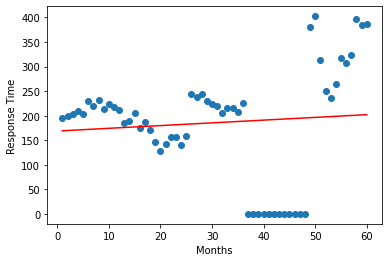

In [ ]:
y_predicted=result.predict(x1)
plt.scatter(x,y)
plt.xlabel("Months")
plt.ylabel("Response Time")
plt.plot(x,y_predicted, "r")
plt.show()

In [170]:
dfall3 = pd.DataFrame({'count' : dfall.groupby(['PoliceDistrict','TypeText']).size()}).reset_index()
dfall3

,PoliceDistrict,TypeText,count
0,0,ABANDONED BOAT,1
1,0,ABANDONED VEHICLE,3
2,0,AGGRAVATED ASSAULT,37
3,0,AGGRAVATED ASSAULT DOMESTIC,16
4,0,AGGRAVATED BATTERY,8
...,...,...,...
1509,8,VIDEO VOYEURISM,16
1510,8,VIOLATION OF PROTECTION ORDER,127
1511,8,WALKING BEAT,418
1512,8,WARR STOP WITH RELEASE,3340


In [190]:
mask = (dfall['PoliceDistrict']==8) & (dfall['TypeText']=='WRECKLESS DRIVING')
len(dfall.loc[mask])

3

In [171]:
dfall['TypeText'].nunique()

190

In [176]:
dfall4 = pd.DataFrame({'count' : dfall3.groupby(['PoliceDistrict'])['count'].sum()}).reset_index()
dfall4

,PoliceDistrict,count
0,0,14397
1,1,304758
2,2,234677
3,3,380929
4,4,206788
5,5,231202
6,6,270931
7,7,291726
8,8,288169


In [189]:
mask = (dfall['PoliceDistrict']==8)
len(dfall.loc[mask])

288169

In [177]:
dfall5 = pd.DataFrame({'count' : dfall3.groupby(['TypeText'])['count'].sum()}).reset_index()
dfall5

,TypeText,count
0,ABANDONED BOAT,31
1,ABANDONED VEHICLE,2686
2,AGGRAVATED ARSON,67
3,AGGRAVATED ASSAULT,4956
4,AGGRAVATED ASSAULT DOMESTIC,1505
...,...,...
185,VIOLATION OF PROTECTION ORDER,2038
186,VOTING/ELECTION EVENT,1
187,WALKING BEAT,4427
188,WARR STOP WITH RELEASE,59377


In [192]:
mask = (dfall['TypeText']=='WRECKLESS DRIVING')
len(dfall.loc[mask])

29

In [215]:
dfall6 = dfall3.merge(dfall4,how='left',on='PoliceDistrict',suffixes=('_EventinDistrict', '_DistrictAllEvents')).merge(dfall5,how='left',on='TypeText',suffixes=('_EventinAll'))
dfall6 = dfall6[dfall6['count']>100]
dfall6['CondProb']=(dfall6['count_DistrictAllEvents']/len(dfall))*(dfall6['count_EventinDistrict']/dfall6['count_DistrictAllEvents'])
dfall6['UnCondProb']=dfall6['count']/len(dfall)
dfall6['ProbRat']=dfall6['CondProb']/dfall6['UnCondProb']
dfall6

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:7963: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


,PoliceDistrict,TypeText,count_EventinDistrict,count_DistrictAllEvents,count,CondProb,UnCondProb,ProbRat
1,0,ABANDONED VEHICLE,3,14397,2686,0.000001,0.001208,0.001117
2,0,AGGRAVATED ASSAULT,37,14397,4956,0.000017,0.002229,0.007466
3,0,AGGRAVATED ASSAULT DOMESTIC,16,14397,1505,0.000007,0.000677,0.010631
4,0,AGGRAVATED BATTERY,8,14397,1076,0.000004,0.000484,0.007435
5,0,AGGRAVATED BATTERY BY CUTTING,16,14397,761,0.000007,0.000342,0.021025
...,...,...,...,...,...,...,...,...
1508,8,VEHICLE PURSUIT,5,288169,153,0.000002,0.000069,0.032680
1509,8,VIDEO VOYEURISM,16,288169,289,0.000007,0.000130,0.055363
1510,8,VIOLATION OF PROTECTION ORDER,127,288169,2038,0.000057,0.000917,0.062316
1511,8,WALKING BEAT,418,288169,4427,0.000188,0.001991,0.094421


In [216]:
dfall6['ProbRat'].max()

0.9954648526077098

In [217]:
dfall6['ProbRat'].idxmax()

534

In [218]:
dfall6.loc[534]

PoliceDistrict                                  3
TypeText                   DAILY WALKING BEAT LOG
count_EventinDistrict                         439
count_DistrictAllEvents                    380929
count                                         441
CondProb                               0.00019743
UnCondProb                            0.000198329
ProbRat                                  0.995465
Name: 534, dtype: object

In [229]:
dfall7 = dfall.groupby('PoliceDistrict').std()
dfall7['Area'] = math.pi * dfall7['MapX']*dfall7['MapY']
dfall7

,MapX,MapY,ResponseTime,Month,Year,MY,Area
PoliceDistrict,,,,,,,
0,1.860867e+07,1.757732e+06,1494.258461,3.305295,1.316393,16.021683,1.027585e+14
1,5.818745e+06,5.142999e+05,886.493270,3.423524,1.388358,17.027317,9.401468e+12
2,5.766083e+06,5.108219e+05,717.719179,3.422316,1.378216,16.857608,9.253376e+12
3,5.023061e+06,4.422185e+05,1121.368121,3.429386,1.381264,16.938130,6.978389e+12
4,6.101564e+06,5.421942e+05,1052.246107,3.380072,1.389936,17.124183,1.039312e+13
5,6.597428e+06,5.829404e+05,1048.205017,3.406603,1.386928,16.960042,1.208227e+13
6,6.340875e+06,5.624822e+05,722.087925,3.424243,1.365117,16.702894,1.120490e+13
7,6.510894e+06,5.712633e+05,1982.453149,3.401409,1.409628,17.315217,1.168495e+13
8,7.595191e+06,6.724604e+05,994.460161,3.485515,1.367716,16.675774,1.604558e+13
